In [1]:
!pip install gdown

In [5]:
import gdown

url = 'https://drive.google.com/uc?export=download&id=1RUifIEw1WBIkyHh9ohgnFLzGXnVGG9ll'

output = 'data.zip'

gdown.download(url, output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?export=download&id=1RUifIEw1WBIkyHh9ohgnFLzGXnVGG9ll
From (redirected): https://drive.google.com/uc?export=download&id=1RUifIEw1WBIkyHh9ohgnFLzGXnVGG9ll&confirm=t&uuid=bbe44779-d550-4b48-abd7-0d8e5aa0b710
To: /content/data.zip
100%|██████████| 7.26G/7.26G [01:25<00:00, 85.0MB/s]


'data.zip'

In [6]:
!unzip /content/data.zip -d Data

Streaming output truncated to the last 5000 lines.
  inflating: Data/data/bdd100k_seg/bdd100k/seg/labels/train/003ddde7-36ee8299_train_id.png  
  inflating: Data/data/bdd100k_seg/bdd100k/seg/labels/train/80b3fc35-c3496b02_train_id.png  
  inflating: Data/data/bdd100k_seg/bdd100k/seg/labels/train/7f1ff0c2-ace62968_train_id.png  
  inflating: Data/data/bdd100k_seg/bdd100k/seg/labels/train/802d8d74-d8efa049_train_id.png  
  inflating: Data/data/bdd100k_seg/bdd100k/seg/labels/train/05fa6494-51df5b78_train_id.png  
  inflating: Data/data/bdd100k_seg/bdd100k/seg/labels/train/bab26b8d-deaa5510_train_id.png  
  inflating: Data/data/bdd100k_seg/bdd100k/seg/labels/train/2b49d4cc-9dd70000_train_id.png  
  inflating: Data/data/bdd100k_seg/bdd100k/seg/labels/train/4573bc68-4884d472_train_id.png  
  inflating: Data/data/bdd100k_seg/bdd100k/seg/labels/train/5e412e85-91a1697d_train_id.png  
  inflating: Data/data/bdd100k_seg/bdd100k/seg/labels/train/06a9e960-0b4cad11_train_id.png  
  inflating: Data/d

In [7]:
import os
import shutil

BASE_DIR = "/content/Data/data/bdd100k"
DATASET_DIR = os.path.join(BASE_DIR, "dataset")
LABELS_DIR = os.path.join(BASE_DIR, "labels")

NEW_STRUCTURE = {
    "train": {"images": os.path.join(BASE_DIR, "train/images"),
              "labels": os.path.join(BASE_DIR, "train/labels")},
    "val": {"images": os.path.join(BASE_DIR, "val/images"),
            "labels": os.path.join(BASE_DIR, "val/labels")},
    "test": {"images": os.path.join(BASE_DIR, "test/images")}
}

for split in NEW_STRUCTURE:
    os.makedirs(NEW_STRUCTURE[split]["images"], exist_ok=True)
    if "labels" in NEW_STRUCTURE[split]:
        os.makedirs(NEW_STRUCTURE[split]["labels"], exist_ok=True)


def move_files(split):
    image_src_dir = os.path.join(DATASET_DIR, split)
    image_dst_dir = NEW_STRUCTURE[split]["images"]

    for img_file in os.listdir(image_src_dir):
        if img_file.endswith(".jpg"):
            shutil.move(os.path.join(image_src_dir, img_file), os.path.join(image_dst_dir, img_file))

    if "labels" in NEW_STRUCTURE[split]:
        label_src_dir = os.path.join(LABELS_DIR, split)
        label_dst_dir = NEW_STRUCTURE[split]["labels"]

        for label_file in os.listdir(label_src_dir):
            if label_file.endswith(".txt"):
                shutil.move(os.path.join(label_src_dir, label_file), os.path.join(label_dst_dir, label_file))


for split in ["train", "val"]:
    move_files(split)

test_src_dir = os.path.join(DATASET_DIR, "test")
test_dst_dir = NEW_STRUCTURE["test"]["images"]
for img_file in os.listdir(test_src_dir):
    if img_file.endswith(".jpg"):
        shutil.move(os.path.join(test_src_dir, img_file), os.path.join(test_dst_dir, img_file))

print("✅ Данные успешно перемещены в новую структуру!")


✅ Данные успешно перемещены в новую структуру!


In [8]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 17270, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 17270 (delta 0), reused 0 (delta 0), pack-reused 17269 (from 2)
Receiving objects: 100% (17270/17270), 16.10 MiB | 21.69 MiB/s, done.
Resolving deltas: 100% (11855/11855), done.


In [9]:
%cd yolov5
!pip install -r requirements.txt

/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 923.8/923.8 kB 47.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.

In [10]:
%cp /content/yolov5/data/VOC.yaml /content/yolov5/VOC.yaml

In [11]:
import os

LABELS_DIRS = [
    "/content/Data/data/bdd100k/train/labels",
    "/content/Data/data/bdd100k/val/labels"
]

def replace_class_id(labels_dir, old_id="9", new_id="0"):
    for file_name in os.listdir(labels_dir):
        file_path = os.path.join(labels_dir, file_name)
        if file_path.endswith(".txt"):
            with open(file_path, "r") as f:
                lines = f.readlines()

            new_lines = []
            for line in lines:
                parts = line.strip().split()
                if len(parts) > 0 and parts[0] == old_id:
                    parts[0] = new_id
                new_lines.append(" ".join(parts))

            with open(file_path, "w") as f:
                f.write("\n".join(new_lines) + "\n")

for labels_dir in LABELS_DIRS:
    replace_class_id(labels_dir)

print("✅ ID в разметке заменён с 9 на 0 во всех файлах!")


✅ ID в разметке заменён с 9 на 0 во всех файлах!


In [12]:
!python /content/yolov5/train.py --img 320 --batch 16 --epochs 50 --data /content/yolov5/VOC.yaml --weights /content/yolov5/yolov5s.pt --workers 2

Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
        6/9      1.12G     0.1206    0.01544          0         87        320:   2% 15/625 [00:04<03:25,  2.96it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
        6/9      1.12G     0.1207    0.01556          0         82        320:   3% 16/625 [00:04<03:43,  2.72it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
        6/9      1.12G     0.1202    0.01569          0         84        320:   3% 17/625 [00:04<03:13,  3.15it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp

In [41]:
import pandas as pd

metrics_path = "/content/yolov5/runs/train/exp/results.csv"
df = pd.read_csv(metrics_path)

df.columns = df.columns.str.strip()

metrics = {
    "Precision": df["metrics/precision"].mean(),
    "Recall": df["metrics/recall"].mean(),
    "mAP_50": df["metrics/mAP_0.5"].mean(),
    "mAP_50-95": df["metrics/mAP_0.5:0.95"].mean(),
    "Validation Box Loss": df["val/box_loss"].mean(),
    "Validation Object Loss": df["val/obj_loss"].mean(),
}

metrics


{'Precision': 0.386172,
 'Recall': 0.2398688,
 'mAP_50': 0.2080133,
 'mAP_50-95': 0.07666298,
 'Validation Box Loss': 0.12074800000000001,
 'Validation Object Loss': 0.014319740000000001}

In [49]:
precision = df["metrics/precision"].mean()
recall = df["metrics/recall"].mean()


f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
print(f'{f1_score=}')

f1_score=0.2959251672849438


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-3-11 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


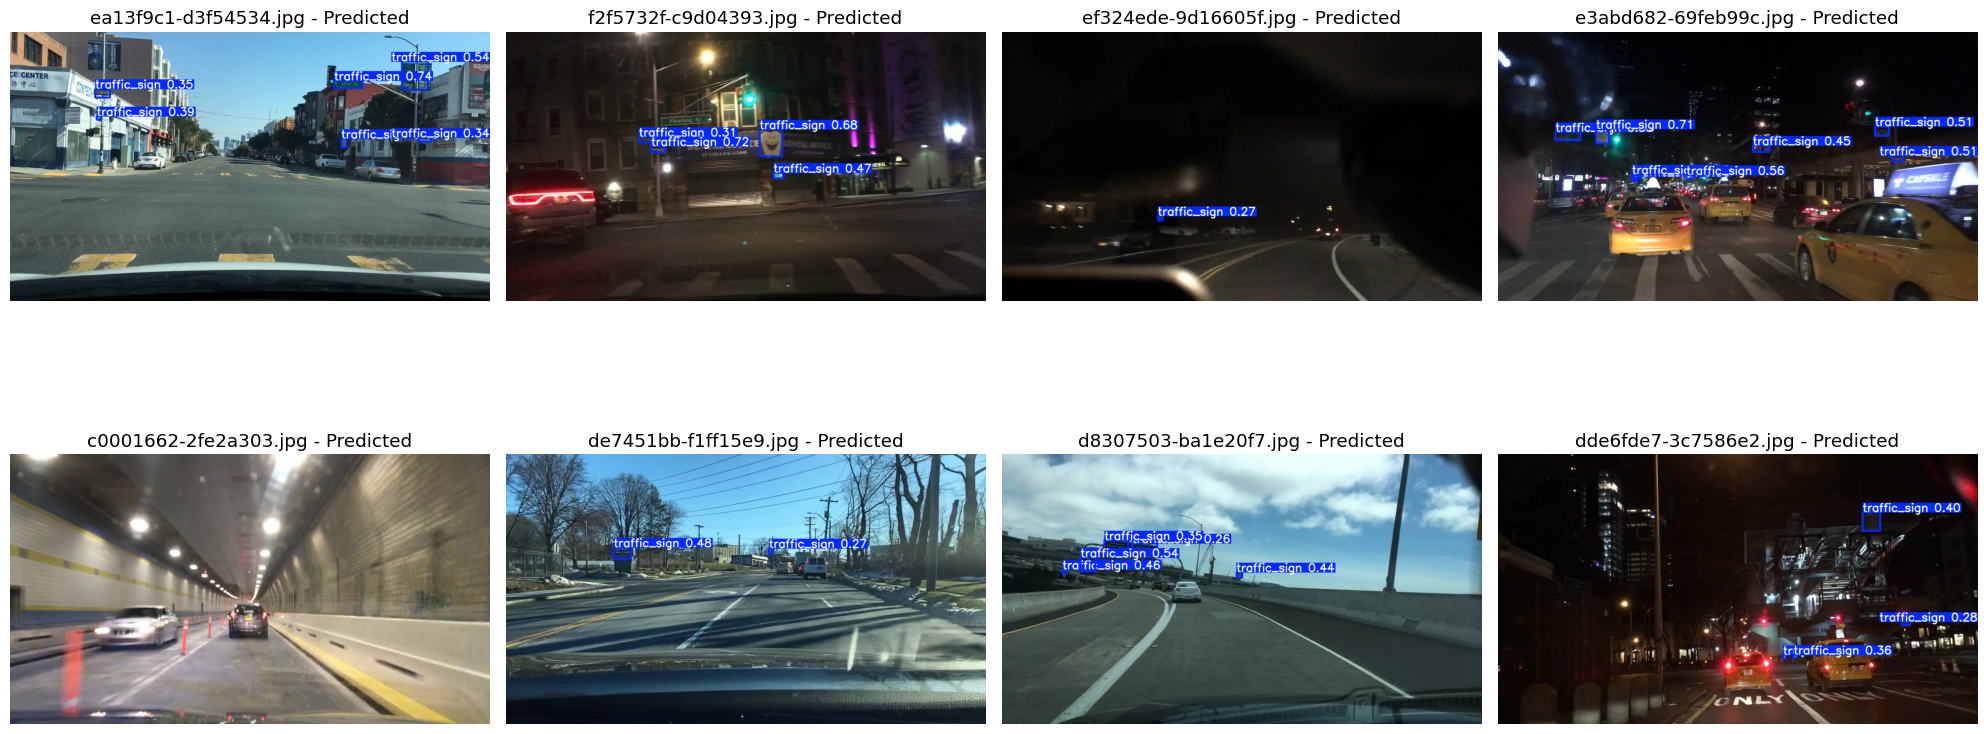

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import itertools
import torch

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


model_path = "/content/yolov5/runs/train/exp/weights/best.pt"
val_images_dir = "/content/Data/data/bdd100k/test/images"

model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_path, force_reload=True)

image_files = os.listdir(val_images_dir)

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for idx, ax in zip(itertools.product(range(2), range(4)), axes.ravel()):
    img_name = np.random.choice(image_files)
    img_path = os.path.join(val_images_dir, img_name)

    img = cv2.imread(img_path)
    if img is None:
        print(f"Изображение {img_path} не загрузилось.")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    results = model(img)

    results.render()
    if results.ims:
        img_pred = results.ims[0]
    else:
        img_pred = img

    ax.imshow(img_pred)
    ax.set_title(f"{img_name} - Predicted")
    ax.axis("off")

plt.tight_layout()
plt.show()
